<img src="../figs/holberton_logo.png" alt="logo" width="500"/>

# Classification of Hand Written Digits

## 0. Image Classification Task

Image classification is a fundamental task in machine learning and computer vision where the goal is to **assign a label to an image from a predefined set of categories**. This task involves analyzing the content of an image and identifying the objects or patterns present in it.


### Importance of Image Classification:

- **Medical Diagnosis**: Helps in diagnosing diseases by classifying medical images, such as X-rays and MRI scans, enabling early detection and treatment.

- **Security and Surveillance**: Enhances security systems by identifying objects, activities, or individuals in surveillance footage.

- **Retail and E-commerce**: Improves customer experience by automatically tagging products, enabling visual search, and providing personalized recommendations.

- **Self-Driving Cars**: Essential for autonomous vehicles to recognize and respond to various objects on the road, such as traffic signs, pedestrians, and other vehicles.

This example shows how to build a feed forward neural network that can be used to recognize images of hand-written digits, from 0-9.

### Basic Image Classification through the MNIST dataset

The MNIST dataset is a widely used benchmark in the field of machine learning and computer vision, consisting of 70,000 grayscale images of handwritten digits (0-9), each sized 28x28 pixels. It includes 60,000 training images and 10,000 testing images. MNIST serves as a standard for evaluating and comparing the performance of various neural network architectures due to its simplicity, well-structured format, and the broad availability of pre-existing results for reference

### Workflow

<img src="../figs/3-supervised/pipeline.png" alt="logo" width="900"/>


Our workflow will consist of the following steps
- import libraries needed to compile and train the neural network and visualize data
- get the MNIST dataset of handwritten digits
- preprocess the data
- split the dataset into data used for training and testing
- build the neural network
- train the neural network
- test the neural network by evaluating its performance



## Import libraries
- tensorflow
- keras
- matplotlib

In [1]:
# Let's import the libraries we'll need
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Load the MNIST dataset
- the dataset is part of keras
- store the data in tuples for training and testing

In [2]:
# Now, let'`s load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("X train", x_train.shape)
print("X test", x_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

X train (60000, 28, 28)
X test (10000, 28, 28)
y train (60000,)
y test (10000,)


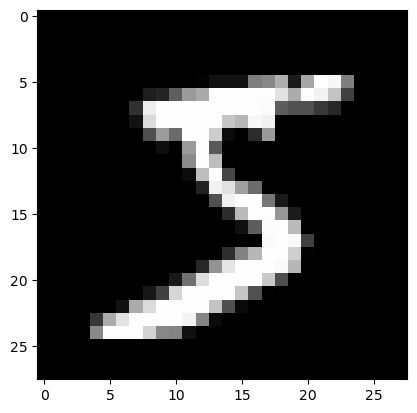

In [4]:
plt.imshow(x_train[0], cmap='gray')

plt.show()

## Preprocess the data
- the color pixel value of each image will be represented as a float from 0 to 1

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

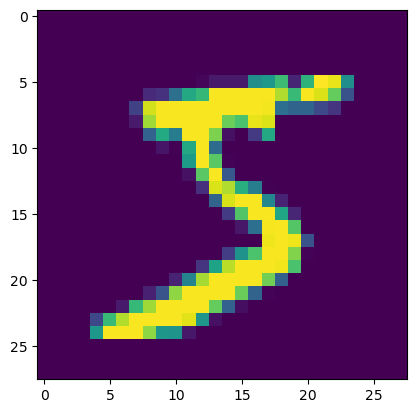

In [6]:
plt.imshow(x_train[0])

## Split the dataset in train, validation and test dataset
- validation will contain the first 5000 images
- train will contain all images, but the first 5000

In [7]:
# now, we will split the dataset in train, validation and test dataset
x_val = x_train[:5000] # validation set
x_train = x_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]


print("X train", x_train.shape)
print("X test", x_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)
print("x valid", x_val.shape)
print("y valid", y_val.shape)

X train (55000, 28, 28)
X test (10000, 28, 28)
y train (55000,)
y test (10000,)
x valid (5000, 28, 28)
y valid (5000,)


## Build Neural Network 
- Define a sequential model containing
  - a flatten layer receiving inputs in the shape of 28 x 28 pixels
  - a Dense layer of 128 neurons, using the `relu` activation function
  - a Dense layer of 10 neurons using the `softmax` activation function

In [8]:
# Now, let's define our neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model
- use the `adam` optimizer
- use the `sparse categorical cross entropy` loss function
- use `accuracy` as metrics

In [9]:
# Now, let's compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model
- use method `fit` to train the model for 5 epochs
- use also the validation data

In [10]:
# Now, let's train the model, and also save the history of training and validation
history = model.fit(x_train, y_train,
                   epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2749 - accuracy: 0.9210 - val_loss: 0.1397 - val_accuracy: 0.9604
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1227 - accuracy: 0.9638 - val_loss: 0.1027 - val_accuracy: 0.9684
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9749 - val_loss: 0.0987 - val_accuracy: 0.9726
Epoch 4/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0765 - val_accuracy: 0.9762
Epoch 5/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0795 - val_accuracy: 0.9780
Epoch 6/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 7/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0987 - val_accuracy:

## Evaluate the model
- evaluate the model on the test set
- store the test loss and the test accuracy

In [11]:
# Now, let's evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test data accuracy", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9753
Test data accuracy 0.9753000140190125


## Visualize data
- use `matplotlib.pyplot` to plot the training and validation accuracy and loss
- display the number of epochs and the accuracy

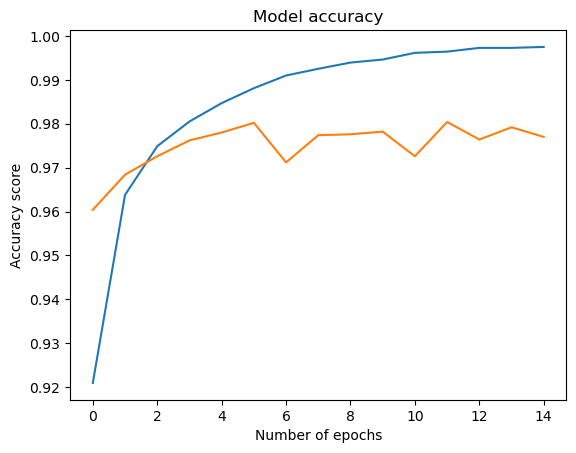

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy score")

plt.show()

## Evaluation Metrics

313/313 [==============================] - 1s 2ms/step


<Axes: >

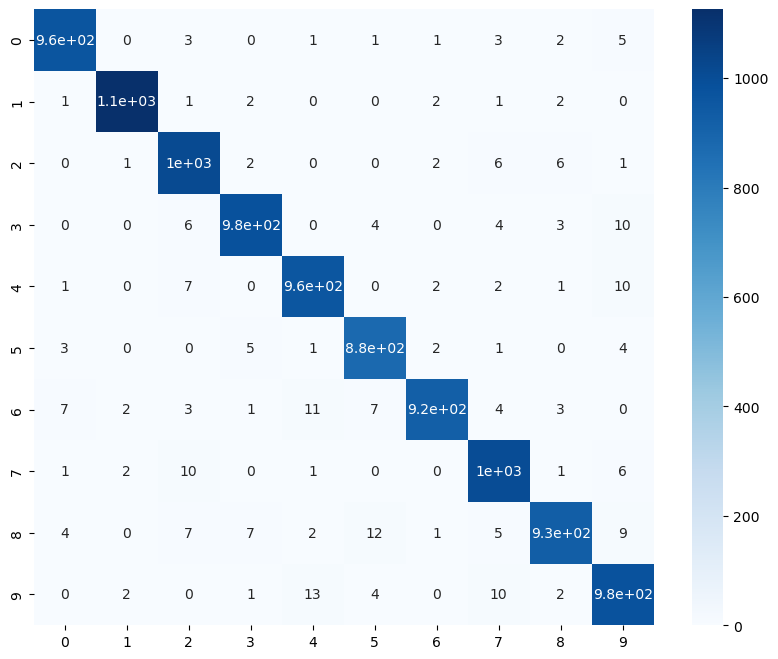

In [27]:
# Import necessary libraries for classification metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1 score



plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

# Visualize the confusion matrix

## Visualize the classification of several images
- select 20 images at random
- visualize the images alongside their labels in a grid-like plot

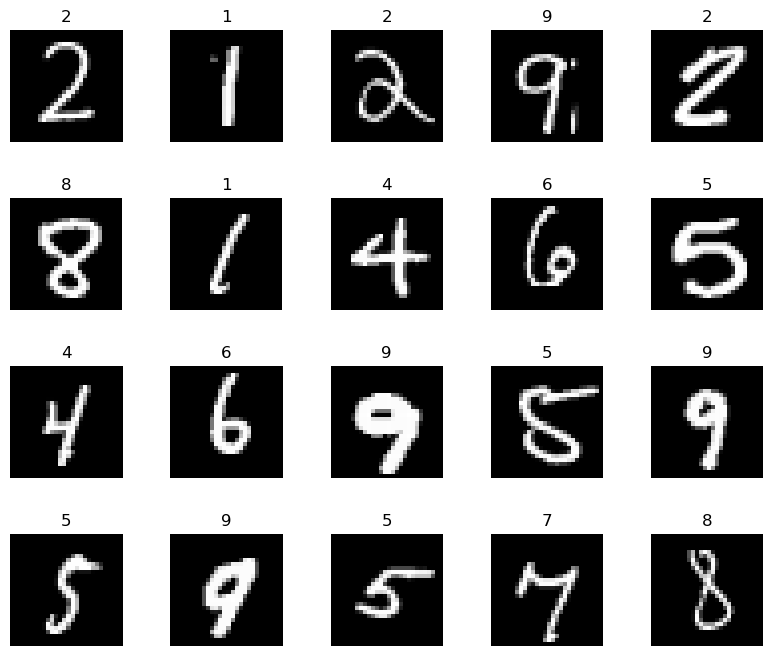

In [14]:
import numpy as np
random_indices = np.random.randint(0, len(x_train), 20)
random_images = x_train[random_indices]
random_labels = y_train[random_indices]

fix, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

for i, ax in enumerate(axes):
  ax.imshow(random_images[i], cmap='gray')
  ax.axis("off")
  ax.set_title(str(random_labels[i]))

plt.subplots_adjust(hspace=0.5)
plt.show()

## Congrats on building your (first) neural network